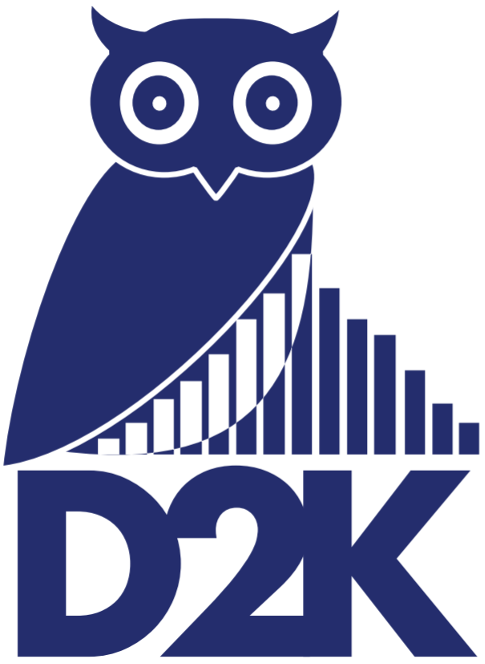 

<center>

# Welcome to COMP 680 #
### Statistics for Computing and Data Science ###

### Homework 5 ###

In [ ]:
### standard imports
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline  
plt.style.use('fivethirtyeight')
plt.rcParams["patch.force_edgecolor"] = True
import seaborn as sns

import statsmodels.api as sm
from statsmodels.sandbox.predict_functional import predict_functional
import scipy.stats as st

import warnings
warnings.filterwarnings("ignore")

## Part I: Bayesian Inference

You work as an actuary in an automobile insurance compny. The following table shows one year of claims data: out of total of 9461 policy holders, 7840 made no claims during this year, 1317 made a single claim, 239 made two claims etc. Your job is of course to estimate how many expected claims each policy holder will make in the next year.


| Number of claims x | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 |Total
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| Count of policy holders | 7840 | 1317 | 239 | 42 | 14 | 4 | 4 | 1 | 9461 |

**Question 1.1**: Let's assume for each policy holder $k$, the number of claims to be made in a single year $X_k$ follows a Poisson distribution with parameter $\theta_k$. From the company's point of view, a good policy holder should have a small value of $\theta$ (why?), though in any one year the actual number of claims $x_k$ will vary randomly according to the probability mass function: 
$$\mathbb{P}(X_k = x) = \frac{ \theta^x e^{-\theta} } {x!}$$
Suppose we want to put a prior distribution $\pi(\theta)$ on the unknown parameter $\theta$, without specifying what this prior distribution $\pi(\theta)$ is, use Bayes formula to derive the posterior distribution $\pi(\theta | x)$ including the normalizing constant, assuming only one single data point $x$: remember for each policy holder you only have their number of claims in one year, i.e. a single data point. Do NOT simplify any terms for now.

**Solution**:


**Question 1.2**: Assuming you have correctly derived the posterior distribution $\pi(\theta | x)$, what would be a good estimate of expected number of claims a policy holder will make next year, given that he/she has made $x$ claims this year? Write down the expression of your estimate, and do NOT simplify any terms.

**Solution**: 

**Question 1.3**: Remember the normalizing constant in your posterior is called the marginal likelihood:
$$f(x) = \int \frac{\theta^x e^{-\theta} }{x!} \pi(\theta) d \theta$$
Manipulate the expression you got in **1.2** in terms of marginal likelihood, that is, your simplified expression should have no prior distribution $\pi(\theta)$ or even $\theta$!

**Hint:** $(x+1)! = x!  (x+1)$

**Solution**: 


**Question 1.4**: Based on the data you have, what is a good estimate of $f(x)$? Notice this is a discrete distribution even though we call it $f(x)$, because $x$ can only take integer values. In other words, estimate $\mathbb{P}(X = x)$ from the table in the problem. 

**Hint:** this is really simpler than you think, remember the empirical distribution of your data?

**Solution**: 

**Question 1.5**: Estimate the expected number of claims next year for policy holders who made 0 to 6 claims this year, round to 3 decimal places.

**Solution**: 

**You have just completed a Bayesian inference problem, without specifying any prior distribution!** Remember the posterior distribution is not available for any single policy holder without specifying a prior distribution. However, when you have data from a large study, it's as if large data sets of parallel situations carry within them their own Bayesian information. This technique came as a surprise to the statistical world in the begining, known as "empirical Bayes" where the prior information is estimated empirically from the data. In the age of big data, there has been a growing popularity of empirical Bayes methods.

## Part II: Stochastic Processes

**Question 2.1**: Let $X_0, X_1, \dots$ be a Markov chain with states $\{ 0, 1, 2 \}$ and transition matrix

$$ P = \begin{bmatrix}
0.1 & 0.2 & 0.7 \\
0.9 & 0.1 & 0.0 \\
0.1 & 0.8 & 0.1
\end{bmatrix}$$

Assume that the initial distribution is $\pi_0 = (0.3, 0.4, 0.3)$.  Find $\mathbb{P}(X_0 = 0, X_1 = 1, X_2 = 2)$ and $\mathbb{P}(X_0 = 0, X_1 = 1, X_2 = 1)$.

**Solution:**

**Question 2.2**: Let $Y_1, Y_2, \dots$ be a sequence of iid observations such that $\mathbb{P}(Y = 0) = 0.1$, $\mathbb{P}(Y = 1) = 0.3$,  $\mathbb{P}(Y = 2) = 0.2$, $\mathbb{P}(Y = 3) = 0.4$.  Let $X_0 = 0$ and let

$$ X_n = \max \{ Y_1, \dots, Y_n \} $$

Show that $X_0, X_1, \dots$ is a Markov chain and find the transition matrix.

**Solution:**

**Question 2.3**: Su wants to start a Boba tea shop near Rice. The plan is to have the shop open from 9am to 5pm everyday, and she needs to study her potential customer base to determine how large her shop should be. Suppose people start to arrive following a Poisson process with intensity $\lambda=1/2$ / min. Assume that a person stays in the shop for some random time (in min) that follows exponential distribution with $\lambda=1/15$, and is independent of other people. Let $Y(t)$ be the number of people in the shop at time t. It turns out that $Y(t)$ is a Poisson process with inhomogeneous rate. Can you simulate $Y(t)$? Based on your simulation, what would be the expected maximum number of people in the shop?

**Hint**: Create a function that can simulate one realization of the process $Y(t)$, i.e., number of customers at any given time $t$ for a given day. You can assume the smallest time increment is minute, i.e., you will simulate $Y(t)$ for $t$ being any minute of a day from 9am to 5pm. Then use your function to simulate multiple days, and use empirical probability to calculate the expected maximum number!

**Simulation Solution**:

In [ ]:
# enter your code here, feel free to add lots of code cells

**Question 2.4**:  Let $X(t)$ be a Poisson process with intensity $\lambda$.  Find the conditional distribution of $X(t)$ given that $X(t + s) = n$.

**Hint**: Both $X(t)$ and $X(t + s)$ are discrete random variables. Start with definition of conditional probability. 

**Solution:**

## Part III: NHANES Case Study

In this part, we will be working with the [NHANES](https://wwwn.cdc.gov/nchs/nhanes/continuousnhanes/default.aspx?BeginYear=2015) data again. We will perform the same processing and cleaning of the data as before:

In [ ]:
nhanes = pd.read_csv("nhanes_2015_2016.csv")
# fix column names to be informative
new_col_names = {'SEQN':'ID', 'ALQ130':'avg_drinks_per_day', 'SMQ020': 'smoker', 
                 'RIAGENDR':'gender', 'RIDAGEYR':'age', 'RIDRETH1':'race', 
                 'DMDCITZN':'citizen', 'DMDEDUC2':'educ_level', 
                 'DMDMARTL':'mari_stat', 'INDFMPIR':'fam_pov_income_ratio', 
                 'BPXSY1':'systolic_bp', 'BPXDI1':'diastolic_bp', 
                 'BMXWT':'weight', 'BMXHT':'height', 'BMXBMI':'bmi', 
                 'BMXLEG':'upper_leg_len', 'BMXARML':'upper_arm_len', 
                 'BMXARMC': 'arm_cir', 'BMXWAIST':'waist_cir'}
nhanes.rename(columns=new_col_names, inplace=True)
# replace some code as missing values
nhanes['avg_drinks_per_day'] =  nhanes['avg_drinks_per_day'].replace({777:np.NaN, 999:np.NaN})
nhanes['smoker'] = nhanes['smoker'].replace({7:np.NaN, 9:np.NaN})
nhanes['educ_level'] = nhanes['educ_level'].replace({7:np.NaN, 9:np.NaN})
nhanes['mari_stat'] = nhanes['mari_stat'].replace({77:np.NaN})
nhanes['citizen'] = nhanes['citizen'].replace({7:np.NaN, 9:np.NaN})
# there are quite a few missing values but most model will exclude them
nhanes.head()

**Question 3.1:**  
Use linear regression to relate the expected body mass index (BMI) to a person's age.

In [ ]:
# enter your code here


**3.1.1:**  According to your fitted model, do older people tend to have higher or lower BMI than younger people?

**Solution:**  

**3.1.2:**   Based your analysis, are you confident that there is a relationship between BMI and age in the population that NHANES represents?

**Solution:**  

**3.1.3:** By how much does the average BMI of a 40 year old differ from the average BMI of a 20 year old?

**Solution:**  

**3.1.4:** What fraction of the variation of BMI in this population is explained by age?

**Solution:**  

**Question 3.2:**

Add gender and race as additional control variables to your linear model relating BMI to age. To make results more readable, you can choose to recode the gender and race groups based on:

- Gender:
    - 1: Male
    - 2: Female
- Race: 
    - 1: Mexican American
    - 2: Other Hispanic
    - 3: Non-Hispanic White
    - 4: Non-Hispanic Black
    - 5: Other Race Including Multi-Racial
    
Otherwise, you need to use `C(Race)` and `C(Gender)` to be included as categorical variables correctly (since they are coded as numbers).

In [ ]:
# enter your code here


**3.2.1:** How did the mean relationship between BMI and age change when you added additional covariates to the model?

**Solution:**  

**3.2.2:** How did the standard error for the regression parameter for age change when you added additional covariates to the model?

**Solution:**  

**3.2.3:** How much additional variation in BMI is explained by age, gender, and race that is not explained by age alone?

**Solution:**  

**3.2.4:** What reference level did the software select for the race variable?

**Solution:**  

**3.2.5:**  What is the expected difference between the BMI of a 40 year-old non-Hispanic white man and a 30 year-old Hispanic man?

**Solution:** 

**3.2.6:** What is the expected difference between the BMI of a 50 year-old Mexican American woman and a 50 year-old non-Hispanic white man?

**Solution:** 

**Question 3.3:** Randomly sample 25% of the NHANES data, then fit the same model you used in question 3.2 to this data set.

You can use [`df.sample`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html) and set `frac=0.25` and `random_state=2023`.

In [ ]:
# enter your code here


**3.3.1:** How do the estimated regression coefficients and their standard errors compare between these two models?  Do you see any systematic relationship between the two sets of results?

**Solution:** 

**Question 3.4:** Visualize the model you fit in question 3.2.

**3.4.1:** Generate a scatterplot of the residuals against the fitted values.

In [ ]:
# enter your code here


**3.4.2:** Generate a scatterplot of true values against the fitted values.

In [ ]:
# enter your code here


**Question 3.5:**

Generate a plot showing the fitted mean BMI as a function of age for Mexican American men.  Include a 95% confidence band on your graph.

In [ ]:
# enter your code here


**3.5.1:** According to your graph, what is the longest interval starting at year 30 following which the mean BMI could be constant?  
**Hint:** What is the longest horizontal line starting at age 30 that remains within the confidence band?

**Solution:** 

**3.5.2:** Create lines and confidence bands on the same plot, showing the relationship between age and BMI for white men and women.

In [ ]:
# enter your code here


**3.5.3:** At what ages do these intervals not overlap? What does the result imply?

**Solution:** 

You're done with HW 5!  Be sure to...

* **Save and Checkpoint** from the File menu,
* **Close and Halt** from the File menu,
* **Rename your ipynb file**, replacing with your name,
* **Upload** your file to the course website.